Import Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
ccd=pd.read_csv("F:\Datasets\creditcard.csv")
ccd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
ccd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Dataset information
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# No. of missing value in each column
ccd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Distribution of Safe and fraudulent transactions
ccd['Class'].value_counts()
# This dataset is very unbalanced dataset.

0    284315
1       492
Name: Class, dtype: int64

0----> Safe transaction
1----> Fraudulent Transaction

In [7]:
# Seprating the data for analysis
safe = ccd[ccd.Class == 0]
fraud = ccd[ccd.Class == 1]


In [8]:
print(safe.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
safe_fraud_percentance = []
safe_percentance = (len(safe)/len(ccd))*100
fraud_percentance = (len(fraud)/len(ccd))*100
safe_fraud_percentance.append(safe_percentance)
safe_fraud_percentance.append(fraud_percentance)
print('Normal Transaction in percentance:',safe_percentance)
print('Fraud Transaction in percentance:',fraud_percentance)

Normal Transaction in percentance: 99.82725143693798
Fraud Transaction in percentance: 0.1727485630620034


<BarContainer object of 2 artists>

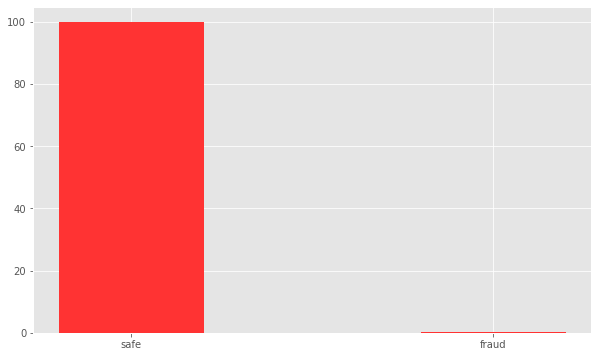

In [12]:
style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar(['safe','fraud'],safe_fraud_percentance,color='#ff3333',width=.4)

In [13]:
# Statistical measures of the data
safe.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# Comparing the value of these classes
ccd.groupby('Class').mean()
# It shows diffrence between safe and fraud transaction using mean value

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under Sampling 

Building a sample dataset containing similar of normal distribution and fraudulent transaction 

In [16]:
safe_sample = safe.sample(n=492) # Here we do random sampling

In [17]:
new_ccd = pd.concat([safe_sample, fraud], axis=0)

In [18]:
new_ccd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
214442,139678.0,2.019527,-0.256601,-1.158954,0.326836,0.239170,-0.029113,-0.147291,-0.135135,0.704000,...,-0.014427,0.074173,0.105780,0.089669,-0.054736,0.264788,-0.039289,-0.044284,40.00,0
173004,121321.0,-0.858019,-0.034365,2.691992,0.193189,-0.687651,0.065590,-0.835630,0.368015,-0.834707,...,-0.095121,0.200891,-0.229687,-0.169128,0.231730,-0.279392,0.399516,0.166549,7.18,0
125321,77617.0,-1.701020,-0.253461,1.658006,-1.008489,0.732353,1.674318,-0.804354,1.403748,0.239718,...,0.265021,0.549410,0.041247,-1.352935,-0.611929,0.075470,0.044000,-0.056768,15.97,0
271196,164456.0,1.770890,-0.156050,-2.469023,1.455928,0.592432,-1.629507,1.287090,-0.648565,-0.171172,...,0.396705,0.921471,-0.362442,0.081649,0.786805,-0.213006,-0.091728,-0.050885,173.38,0
198081,132322.0,0.180641,-0.431356,-0.238992,-3.123677,-0.293560,-0.958579,0.017176,-0.074438,-2.037734,...,0.191674,0.988456,-0.101105,-0.450165,-0.857064,-0.195992,0.468350,0.290607,7.50,0


In [19]:
new_ccd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
new_ccd['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
new_ccd.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92996.296748,-0.043584,0.104703,0.088702,0.059727,0.062193,-0.038195,0.033757,-0.064160,-0.044293,...,-0.001010,0.012437,-0.025600,0.001320,-0.014239,0.002452,-0.006527,-0.029523,0.000351,76.241240
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
# Splitting the data into Features and Targets
X = new_ccd.drop(columns='Class', axis=1)
Y = new_ccd['Class']

In [23]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
214442  139678.0  2.019527 -0.256601 -1.158954  0.326836  0.239170 -0.029113   
173004  121321.0 -0.858019 -0.034365  2.691992  0.193189 -0.687651  0.065590   
125321   77617.0 -1.701020 -0.253461  1.658006 -1.008489  0.732353  1.674318   
271196  164456.0  1.770890 -0.156050 -2.469023  1.455928  0.592432 -1.629507   
198081  132322.0  0.180641 -0.431356 -0.238992 -3.123677 -0.293560 -0.958579   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [24]:
print(Y)

214442    0
173004    0
125321    0
271196    0
198081    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [25]:
# Splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [26]:
print(X_train.shape)
print(X_test.shape)

(787, 30)
(197, 30)


In [27]:
print(Y_train.shape)
print(Y_test.shape)

(787,)
(197,)


logistic Regression

In [28]:
clf = LogisticRegression(penalty='l2', dual=False, ).fit(X_train, Y_train)

In [29]:
clf

LogisticRegression()

In [30]:
X_train_prediction=clf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

In [31]:
print("Accuracy of training data by comparing X_train with Y_train:", training_data_accuracy)

Accuracy of training data by comparing X_train with Y_train: 0.9415501905972046


In [32]:
X_test_prediction=clf.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [33]:
print("Accuracy of test data by comparing X_train with Y_train:", test_data_accuracy)

Accuracy of test data by comparing X_train with Y_train: 0.8984771573604061


In [34]:
from sklearn import metrics
def draw_confusion_matrix(y_test,test_predict):
    confusion_matrix = metrics.confusion_matrix(y_test, test_predict)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

    cm_display.plot()
    plt.show()

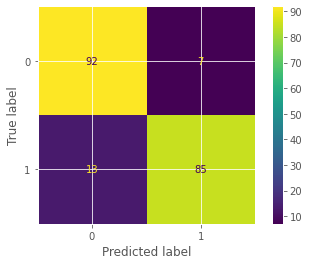

In [35]:
draw_confusion_matrix(Y_test,X_test_prediction)

Prediction Using RandomForest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_train, Y_train.values)

RandomForestClassifier()

In [37]:
Y_pred = clf.predict(X_test) # Using our test set, let's try and make some predictions

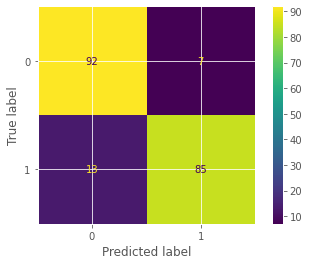

In [38]:
draw_confusion_matrix(Y_test, Y_pred)

In [40]:
def print_scores(y_t, y_p):
    print(f'Accuracy  :{accuracy_score(y_t, y_p):.2f}' )
print_scores(Y_test, Y_pred)

Accuracy  :0.90


In [83]:
clf2 = RandomForestClassifier()
clf2.fit(X_test, Y_test.values)

RandomForestClassifier()

In [84]:
Y_pred = clf.predict(X_test) # Using our test set, let's try and make some predictions

In [89]:
from sklearn.metrics import accuracy_score 
#predicting values 
Y_prediction = clf3.predict(X)

#calculating accuracy
accuracy_score = accuracy_score(Y, Y_prediction)

#printing accuracy
print(accuracy_score)

0.9186991869918699


Prediction Using Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
clf3 = DecisionTreeClassifier(random_state=0)
clf3.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [68]:
from sklearn.metrics import accuracy_score 
#predicting values 
X_prediction = clf3.predict(X)

#calculating accuracy
accuracy_score = accuracy_score(Y, X_prediction)

#printing accuracy
print(accuracy)

Accuracy Score on Training data 0.9817073170731707


In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cross_val_score(clf3, X_train, Y_train, cv=10)

array([0.89873418, 0.91139241, 0.83544304, 0.92405063, 0.88607595,
       0.86075949, 0.91139241, 0.93589744, 0.96153846, 0.94871795])

In [82]:
clf3 = DecisionTreeClassifier(random_state=0)
clf3.fit(X_test, Y_test)

DecisionTreeClassifier(random_state=0)

In [81]:
from sklearn.metrics import accuracy_score 
#predicting values 
X_prediction = clf3.predict(X_test)

#calculating accuracy
accuracy_score = accuracy_score(Y_test, X_prediction)

#printing accuracy
print("Accuracy Score on Test Data:",accuracy_score)

Accuracy Score on Test Data: 1.0
